<a href="https://colab.research.google.com/github/rajy4683/S7EVA4/blob/master/S7EVA4_SingleScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### **RekogNizer library contains the following files:**
```
1. basemodelclass.py:   Contains core model definitions. 
2. fileutils.py:        Contains utility functions for model_name_generation, plotting functions 
3. dataloader.py:       Contains dataloaders for both training and test data
4. traintest.py:        Contains core training, test and model execution flow routines. 
5. logger.py:           Contains functions to handle WANDB integration
6. hyperparams.py:      Contains values of default hyperparameters alongwith getter and setter functions   
7. train_s7_new.py:     Main wrapper script or point of entry. It parses hyperparameters as arguments
8. requirements.txt:    Specific libraries that need to be available in the environment
```








#### Downloading and installing dependencies from the GitHub link:


In [0]:
!git clone https://github.com/rajy4683/RekogNizer.git /content/drive/My\ Drive/EVA4/RekogNizer

In [2]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

#### WANDB client login

In [3]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/')
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')

train_s7_new.py currently can take JSON formatted string as input. Following parameters are configurable and are used in the model training and execution.
```
{"project": "news5", 
 "sched_lr_gamma": 0.5, 
 "no_cuda": false, 
 "dropout": 0.1, 
 "test_batch_size": 128, 
 "batch_size": 128, 
 "epochs": 45, 
 "bias": false, 
 "lr": 0.001, 
 "start_lr": 0, 
 "sched_lr_step": 1, 
 "weight_decay": 0.0, 
 "seed": 1, 
 "momentum": 0.9}

```
This script will be enhanced to handle the following:


1. Inferencing from a saved model
2. Loading and retraining the model
3. Displaying run results from a saved model.



Finally the training run!

In [11]:
!python /content/drive/My\ Drive/EVA4/train_s7_new.py -p '{"lr":0.01,"dropout":0.13596276898345358, "momentum":0.9514506908463995, "epochs":30}' 

Files already downloaded and verified
Files already downloaded and verified
0.001
Setting  lr  =  0.01
Setting  dropout  =  0.13596276898345358
Setting  momentum  =  0.9514506908463995
Setting  epochs  =  30
Final Hyperparameters
             dropout : 0.13596276898345358 
          batch_size : 128 
     test_batch_size : 128 
                  lr : 0.01 
            momentum : 0.9514506908463995 
             no_cuda : False 
                seed : 1 
              epochs : 30 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
             project : news5 
wandb: Tracking run with wandb version 0.8.28
wandb: Run data is saved locally in wandb/run-20200303_105541-08k5ni1e
wandb: Syncing run sweet-bee-765
wandb: ⭐️ View project at https://app.wandb.ai/rajy4683/news5
wandb: 🚀 View run at https://app.wandb.ai/rajy4683/news5/runs/08k5ni1e
wandb: Run `wandb off` to turn off syncing.

Model saved to:  /c

In [0]:
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

import pandas as pd
import numpy as np
import torch

sweet-bee-765


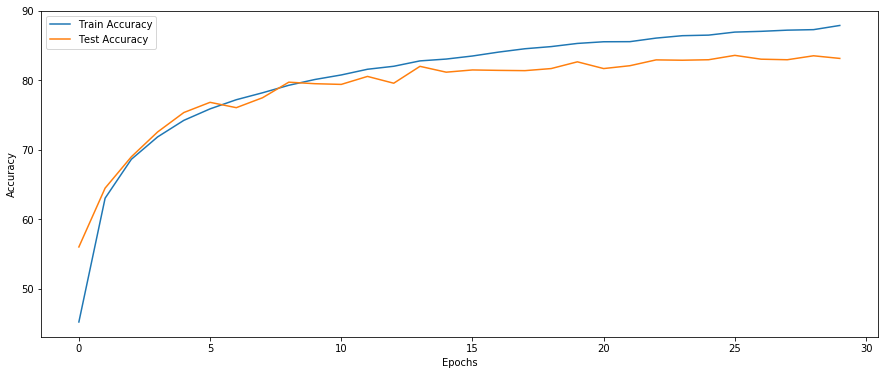

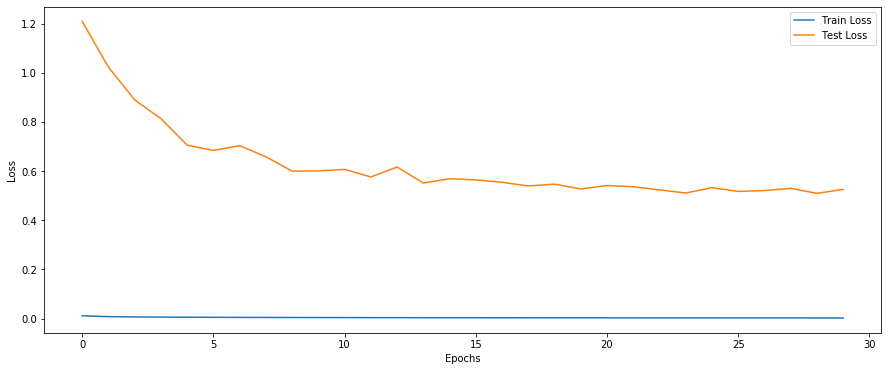

In [13]:


runs_df = logger.get_wandb_dataframes_proj(project="rajy4683/news5",count=1)
new_df = pd.DataFrame().append(runs_df)


fileutils.plot_graphs([new_df],
            ['Train Accuracy', 'Test Accuracy'],
            columns=['Train Accuracy', 'Test Accuracy'],
            xlabel="Epochs",
            ylabel="Accuracy")

fileutils.plot_graphs([new_df],
            ['Train Loss', 'Test Loss'],
            columns=['Train Loss', 'Test Loss'],
            xlabel="Epochs",
            ylabel="Loss")

In [22]:
my_model = traintest.model_builder(basemodelclass.CIFARModelDepthDilate, weights_path="/content/drive/My Drive/EVA4/model_saves/model-2234150fbd.h5")
class_accuracy_dict = traintest.classwise_accuracy(my_model, dataloader.testloader, dataloader.classes, device=torch.device("cpu"))

Accuracy of plane : 81 %
Accuracy of   car : 88 %
Accuracy of  bird : 73 %
Accuracy of   cat : 65 %
Accuracy of  deer : 79 %
Accuracy of   dog : 73 %
Accuracy of  frog : 87 %
Accuracy of horse : 84 %
Accuracy of  ship : 91 %
Accuracy of truck : 90 %


<BarContainer object of 10 artists>

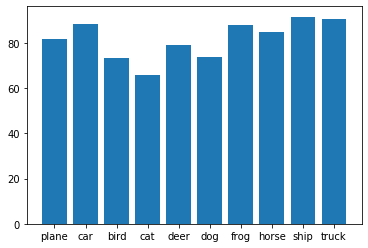

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])